arquivo de teste [sweep](https://www.dropbox.com/s/vnjkfcsmcigsbrz/sweep.wav?dl=1) (colocar em uma pasta /wav/ na raiz do notebook)

# **FILTRO FIR**

Creating Filter
Done Creating Filter


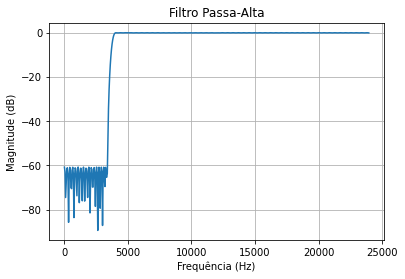

In [2]:
import numpy as np
from scipy import signal, io
import matplotlib.pyplot as plt
import wave
import os

def plot_response(fs, w, h, title):
    plt.figure()
    plt.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
    #plt.ylim(-130, 5)
    #plt.xlim(0, 0.5*fs)
    plt.grid(True)
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.title(title)

def filter_create(fs, cutoff, transb, mo, W, n):
    print("Creating Filter")
    hn = signal.remez(n, [0, cutoff - transb, cutoff, 0.5*fs], mo, W, Hz=fs)
    w, h = signal.freqz(hn)
    print("Done Creating Filter")
    return hn, w, h

fs=48000
cutoff = 4000   # frequencia de corte
transb = 600    # largura da banda de transicao
mo = [0,1]      # magnitudes
W = [5,1]       #fatores do filtroiltered_data
n = 229          # ordem do filtro

hn, w, h = filter_create(fs, cutoff, transb, mo, W, n)

plot_response(fs, w, h, "Filtro Passa-Alta")

plt.show()


# **FILTRA AUDIO**

In [ ]:
dirname = os.getcwd()
print(dirname)

def filter_audio(filename, hn):
    print("Filtering Audio")
    fs, x = io.wavfile.read(filename)
    Ns = len(x) 
    y = signal.lfilter(hn, [1.],x)
    print("Done Filtering Audio")
    return y, Ns

filename = dirname + '/wav/sweep.wav'
filename_output = dirname+ '/wav/sweep_filtered.wav'

fs, x = io.wavfile.read(filename)     # frequencia de amostragem e amostras

y, Ns = filter_audio(filename, hn)
y = np.int16(y)

io.wavfile.write(filename_output,48000, y)



xx = np.abs(np.fft.fft(x))
xx = signal.decimate(xx,10)

xx_phase = np.angle(np.fft.fft(x))
xx_phfreq = np.arange(len(xx_phase[:int((len(xx_phase)))]))
xx_mag = xx[:int((len(xx)/2))]
xx_mag = 20*np.log10(np.abs(xx_mag))
xx_mag = np.interp(xx_mag,[np.amin(xx_mag), np.amax(xx_mag)], [-np.amax(xx_mag),0])
xx_freq = np.arange(len(xx[:int((len(xx)/2))]))

yy = np.abs(np.fft.fft(y))
yy = signal.decimate(yy,10)
yy_phase = np.angle(np.fft.fft(y))
yy_phfreq = np.arange(len(yy_phase[:int((len(yy_phase)))]))
yy_mag = yy[:int((len(yy)/2))]
yy_mag = 20*np.log10(np.abs(yy_mag))
yy_mag = np.interp(yy_mag,[np.amin(yy_mag), np.amax(yy_mag)], [-np.amax(yy_mag),0])
yy_freq = np.arange(len(yy[:int((len(yy)/2))]))

plt.figure()
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title("Sinal de Entrada")
plt.xlim(20, 20000)
plt.plot(xx_phfreq, xx_phase, label='Fase')
plt.plot(xx_freq, xx_mag, label='Resp. em Freq')
plt.legend()

plt.figure()
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title("Sinal de Saída")
plt.xlim(20, 20000)
plt.plot(yy_phfreq, yy_phase, label='Fase')
plt.plot(yy_freq, yy_mag, label='Resp. em Freq')
plt.legend()

plt.show()



# **FILTRO IIR**

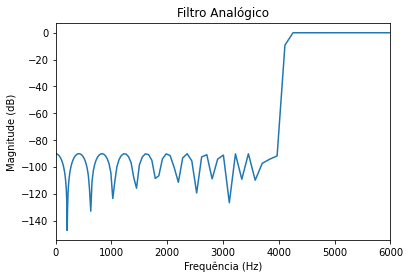

<Figure size 432x288 with 0 Axes>

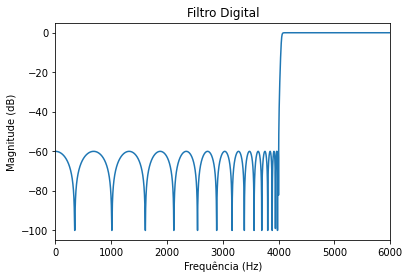

In [10]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Ord = 30

b, a = signal.iirfilter(Ord, 2*np.pi*4000, rp=0.5 , rs=60, btype='high', analog=True, ftype='cheby2')

w, h = signal.freqs(b, a)

y = 30 * np.log10(np.maximum(abs(h), 1e-5))
x = w / (2*np.pi)

plt.figure()
plt.plot(x, y)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title("Filtro Analógico")
plt.xlim(0, 6000)
plt.show()

dfilter = signal.iirfilter(Ord, 4000, rs=60, btype='high', analog=False, ftype='cheby2', fs=12000, output='sos')

w, h = signal.sosfreqz(dfilter, 12000, fs=12000)

plt.figure()

yd = 20 * np.log10(np.maximum(abs(h), 1e-5))
xd = w

plt.figure()
plt.plot(xd, yd)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title("Filtro Digital")
plt.xlim(0, 6000)

#y, Ns = filter_audio(filename, dfilter)


plt.show()